### **随机数生成与特殊函数模块**

#### **1. 随机数生成**

通过 `scipy.stats` 中的分布类生成随机数。随机数生成可以用于模拟实验、数据增强等任务。

---

### **随机数生成公式和代码示例**

#### **1.1 常见分布的随机数生成**

| **分布类型**  | **函数**          | **公式或描述**                                                                                 | **示例**                                                                                  |
|---------------|-------------------|----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| 正态分布      | `norm.rvs`        | $ X \sim N(\mu, \sigma^2) $: $ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $ | 自然现象、测量误差                                                                       |
| 伯努利分布    | `bernoulli.rvs`   | $ P(X=1) = p, P(X=0) = 1-p $                                                                | 抛硬币                                                                                  |
| 二项分布      | `binom.rvs`       | $ P(X=k) = \binom{n}{k} p^k (1-p)^{n-k} $                                                   | $ n $ 次独立试验中成功次数                                                             |
| 泊松分布      | `poisson.rvs`     | $ P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $                                              | 单位时间内随机事件数                                                                     |
| 均匀分布      | `uniform.rvs`     | $ X \sim U(a, b): f(x) = \frac{1}{b-a}, a \leq x \leq b $                                    | 随机选取范围内值                                                                         |
| Beta 分布     | `beta.rvs`        | $ f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)} $                             | 概率分布建模                                                                             |
| Gamma 分布    | `gamma.rvs`       | $ f(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x} $                    | 信号处理、等待时间问题                                                                   |
| 对数正态分布  | `lognorm.rvs`     | 如果 $ Y = \log(X) \sim N(\mu, \sigma^2) $，则 $ X $ 为对数正态分布                        | 金融数据建模                                                                             |





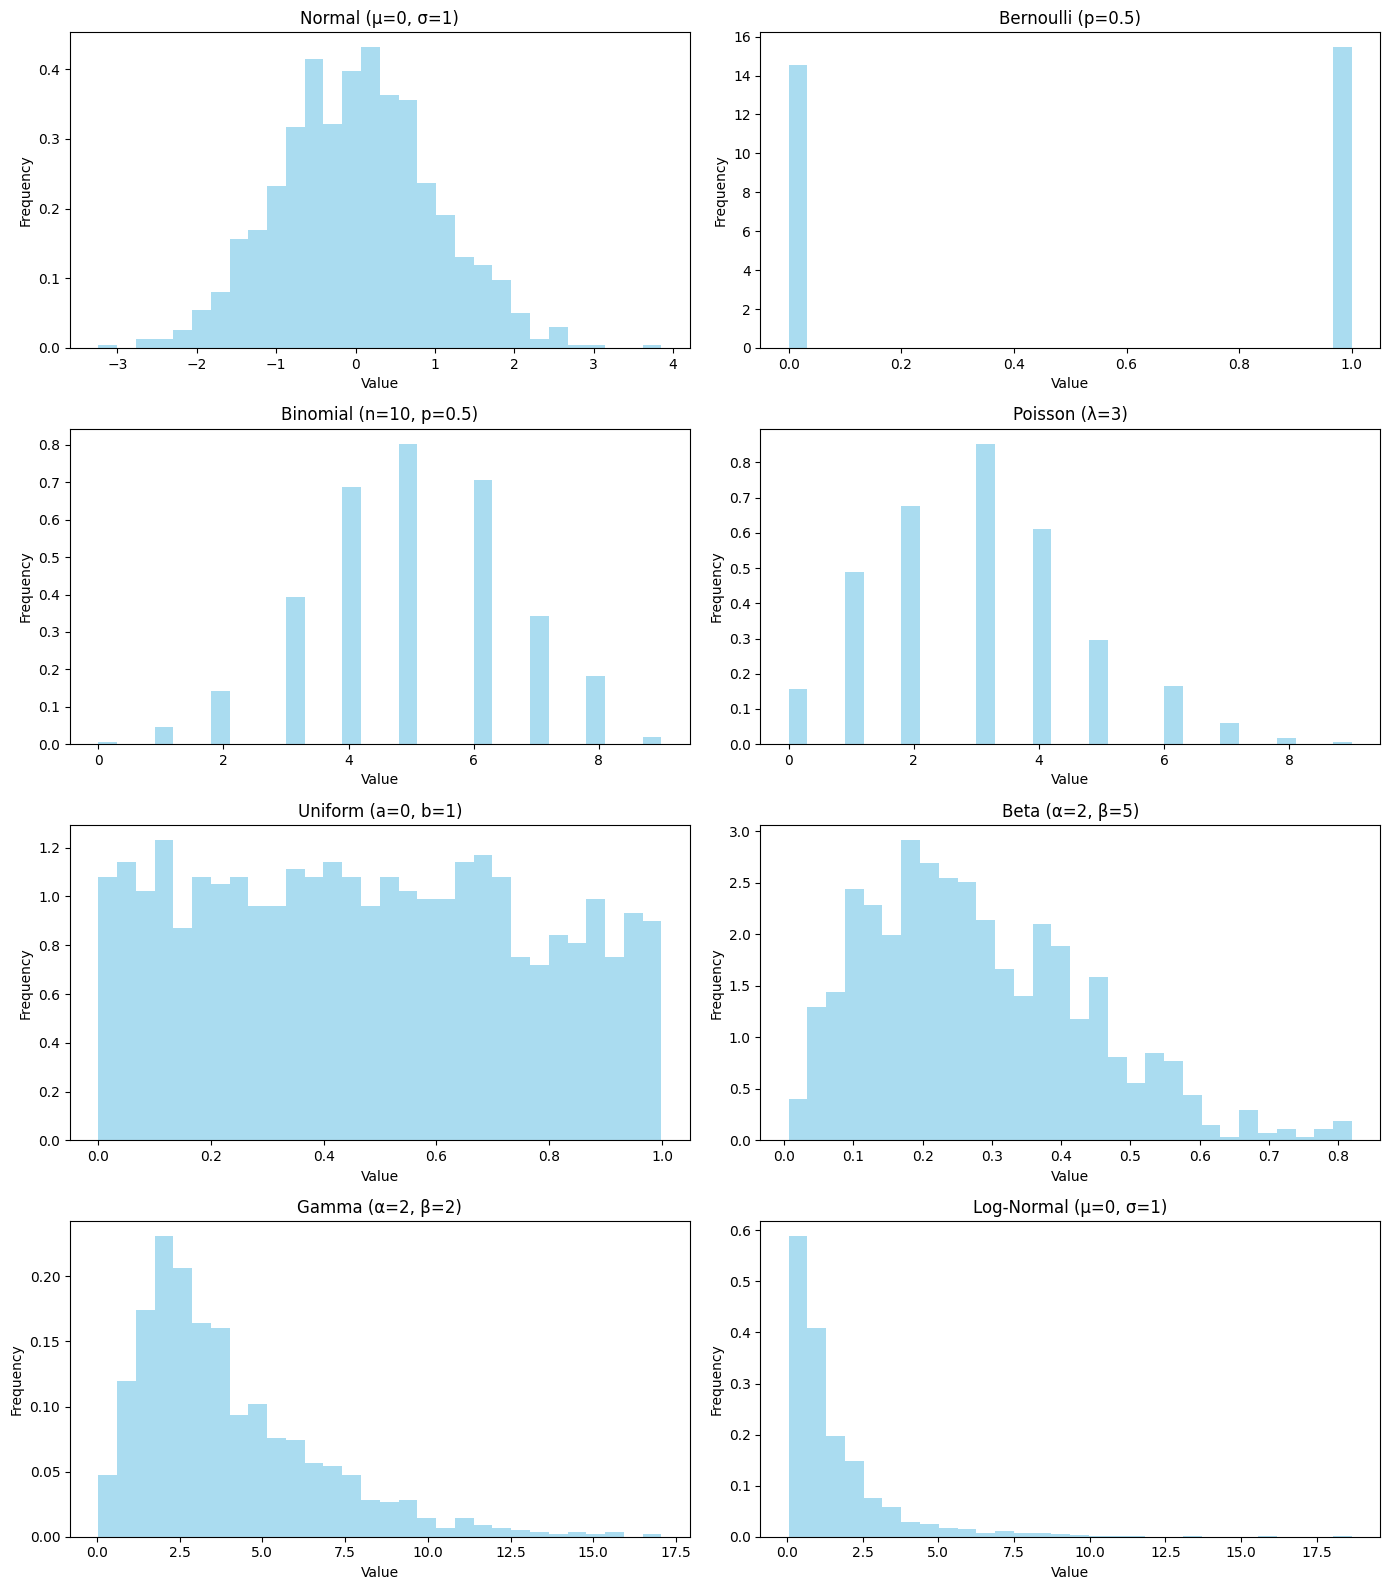

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, poisson, uniform, beta, gamma, lognorm

# 参数设置
np.random.seed(42)
sample_size = 1000

# 生成随机数
distributions = {
    "Normal (μ=0, σ=1)": norm.rvs(loc=0, scale=1, size=sample_size),
    "Bernoulli (p=0.5)": bernoulli.rvs(p=0.5, size=sample_size),
    "Binomial (n=10, p=0.5)": binom.rvs(n=10, p=0.5, size=sample_size),
    "Poisson (λ=3)": poisson.rvs(mu=3, size=sample_size),
    "Uniform (a=0, b=1)": uniform.rvs(size=sample_size),
    "Beta (α=2, β=5)": beta.rvs(a=2, b=5, size=sample_size),
    "Gamma (α=2, β=2)": gamma.rvs(a=2, scale=2, size=sample_size),
    "Log-Normal (μ=0, σ=1)": lognorm.rvs(s=1, scale=np.exp(0), size=sample_size)
}

# 可视化
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, (name, data) in enumerate(distributions.items()):
    axes[i].hist(data, bins=30, density=True, alpha=0.7, color='skyblue')
    axes[i].set_title(name)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **2. 特殊函数**

#### **2.1 常见特殊函数**

| **函数**         | **模块**              | **公式或描述**                                         | **应用场景**                                       |
|------------------|-----------------------|------------------------------------------------------|--------------------------------------------------|
| 伽马函数         | `special.gamma`       | $\Gamma(z) = \int_0^\infty t^{z-1} e^{-t} dt$      | 广义阶乘、概率分布（如 Gamma 分布）               |
| 贝塞尔函数       | `special.jv`, `yv`    | $ J_\nu(x), Y_\nu(x) $: 描述振荡行为                | 信号处理、振荡问题                               |
| 阶乘函数         | `special.factorial`   | $ n! = n \times (n-1) \times \dots \times 1 $      | 组合数计算                                       |
| Erf 函数         | `special.erf`         | $ \text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt $ | 高斯分布积分                                     |


C:\Users\epiph\AppData\Local\Temp\ipykernel_2172\1930823486.py:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(10), factorial_values, label='Factorial Function', use_line_collection=True)


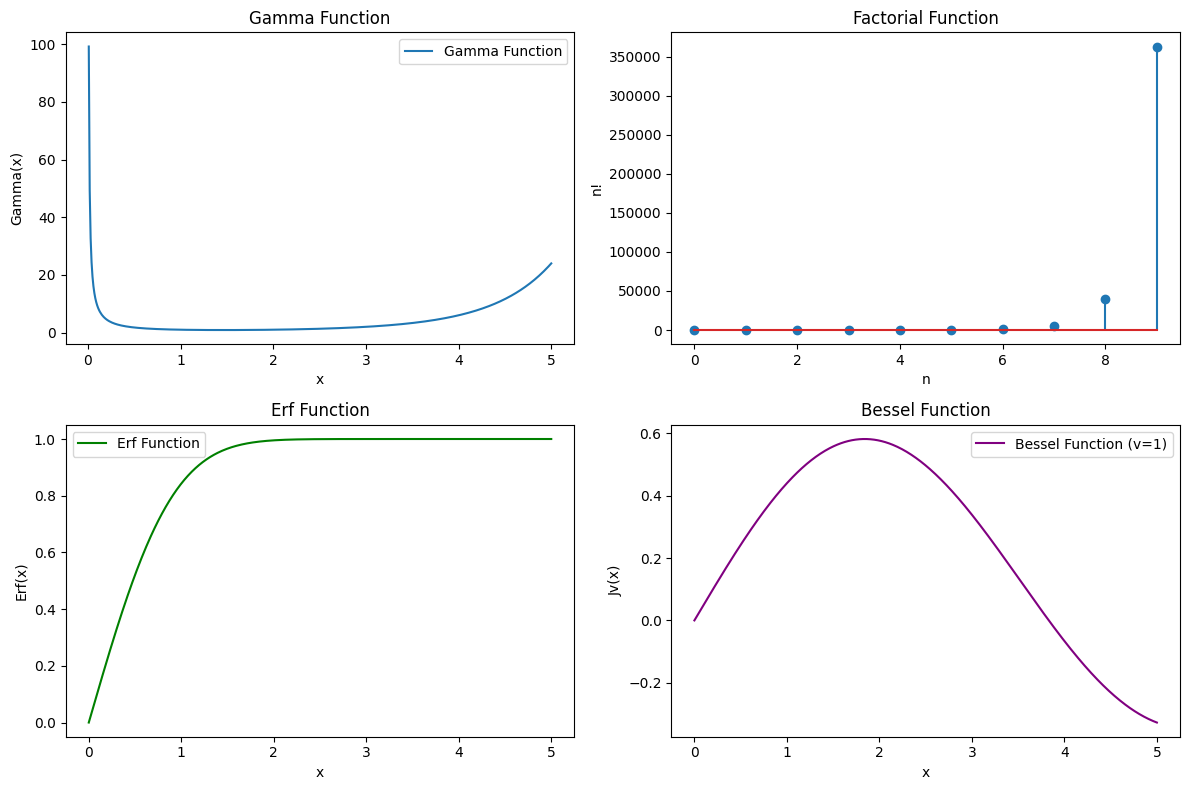

In [2]:
from scipy.special import gamma, factorial, erf, jv

x = np.linspace(0, 5, 500)

# 伽马函数
gamma_values = gamma(x)

# 阶乘（整数部分）
factorial_values = factorial(np.arange(10))

# Erf 函数
erf_values = erf(x)

# 贝塞尔函数
bessel_values = jv(1, x)

# 可视化
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, gamma_values, label='Gamma Function')
plt.title('Gamma Function')
plt.xlabel('x')
plt.ylabel('Gamma(x)')
plt.legend()

plt.subplot(2, 2, 2)
plt.stem(np.arange(10), factorial_values, label='Factorial Function', use_line_collection=True)
plt.title('Factorial Function')
plt.xlabel('n')
plt.ylabel('n!')

plt.subplot(2, 2, 3)
plt.plot(x, erf_values, label='Erf Function', color='green')
plt.title('Erf Function')
plt.xlabel('x')
plt.ylabel('Erf(x)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, bessel_values, label='Bessel Function (v=1)', color='purple')
plt.title('Bessel Function')
plt.xlabel('x')
plt.ylabel('Jv(x)')
plt.legend()

plt.tight_layout()
plt.show()

### **总结**

1. **随机数生成**
   - **支持的分布**：包括正态分布、泊松分布、二项分布、Beta 分布等。
   - **应用**：用于模拟实验、数据增强等。

2. **特殊函数**
   - **支持的函数**：包括伽马函数、贝塞尔函数、Erf 函数等。
   - **应用**：在信号处理、概率计算等场景中使用广泛。